In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'E:\User Data\Documents\rakamin\EDA\train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [11]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [5]:
cats = ['Embarked', 'Sex', 'Cabin']
nums = ['Age', 'SibSp', 'Parch', 'Fare']

In [14]:
df[nums].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [17]:
df[cats].describe()

,Embarked,Sex,Cabin
count,889,891,204
unique,3,2,147
top,S,male,B96 B98
freq,644,577,4


In [6]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
df.duplicated(subset=['PassengerId']).sum()

0

In [8]:
from scipy import stats

In [8]:
print(f'jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))

for col in ['Pclass', 'Sex', 'Age', 'Fare']:
    zscore= abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df = df(filtered_entries)

print(f'jumlah baris sebelum memfilter outlier: {len(df)}')

jumlah baris sebelum memfilter outlier: 891


TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Axes: xlabel='Pclass', ylabel='Density'>

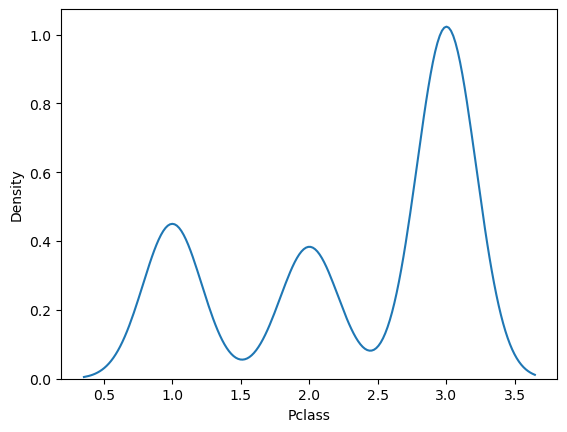

In [9]:
sns.kdeplot(df['Pclass'])

<Axes: xlabel='Pclass', ylabel='Density'>

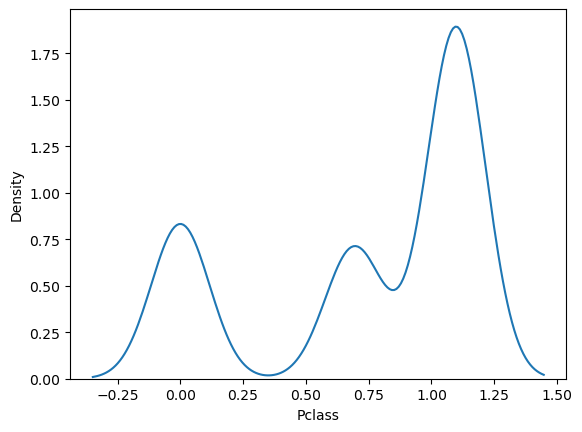

In [10]:
sns.kdeplot(np.log(df['Pclass']))

<Axes: xlabel='Age', ylabel='Density'>

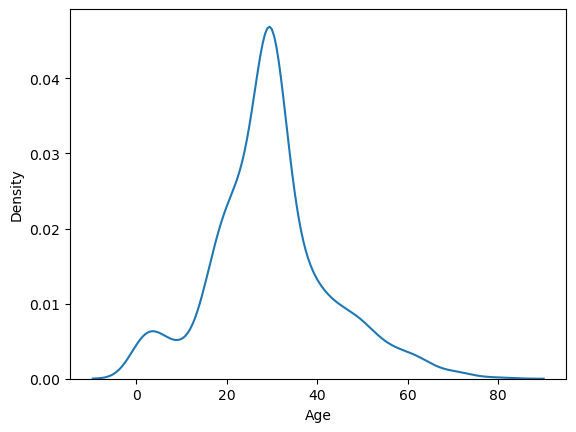

In [11]:
sns.kdeplot(df['Age'])

<Axes: xlabel='Age', ylabel='Density'>

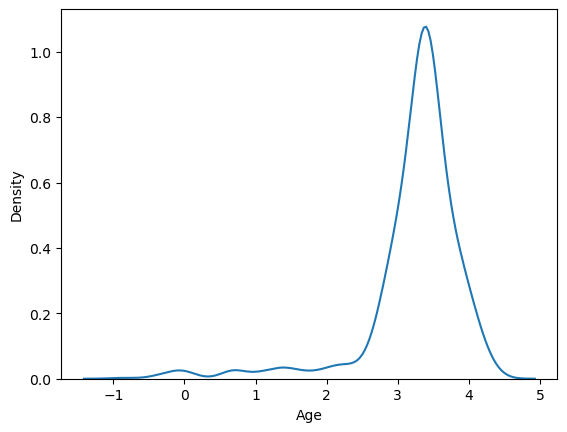

In [12]:
sns.kdeplot(np.log(df['Age']))

<Axes: xlabel='Fare', ylabel='Density'>

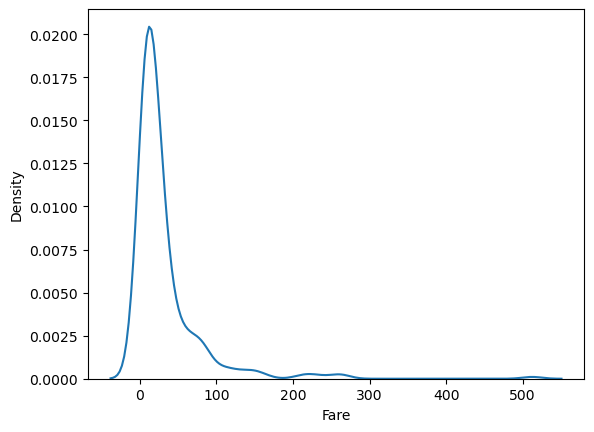

In [12]:
sns.kdeplot(df['Fare'])

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Fare', ylabel='Density'>

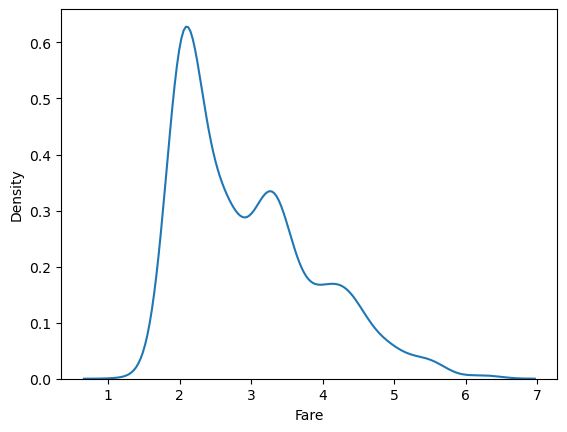

In [13]:
sns.kdeplot(np.log(df['Fare']))

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
df['Age_norm'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df), 1))

df['Age_std'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))

In [38]:
df[['Age', 'Age_norm', 'Age_std']].describe()

,Age,Age_norm,Age_std
count,891.000000,891.000000,8.910000e+02
mean,29.699118,0.367921,2.232906e-16
std,13.002015,0.163383,1.000562e+00
min,0.420000,0.000000,-2.253155e+00
25%,22.000000,0.271174,-5.924806e-01
50%,29.699118,0.367921,0.000000e+00
75%,35.000000,0.434531,4.079260e-01
max,80.000000,1.000000,3.870872e+00


In [16]:
df['Embarked'] = df['Embarked'].astype('category').cat.codes
df['Sex'] = df['Sex'].astype('category').cat.codes
df['Cabin'] = df['Cabin'].astype('category').cat.codes

In [19]:
for cat in ['Survived', 'PassengerId', 'Ticket']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

ValueError: columns overlap but no suffix specified: Index(['Survived_0', 'Survived_1'], dtype='object')

In [20]:
df_new = df.drop(columns=['Survived', 'PassengerId', 'Ticket']).copy()

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 1585 entries, Pclass to Ticket_WE/P 5735
dtypes: float64(4), int16(1), int64(3), int8(2), object(1), uint8(1574)
memory usage: 1.4+ MB


In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
x = df_new.drop
y = df_new['Survived'].values

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x.info()